# Support Vector Machine for Predicting Wine Quality

### Import Required Libraries

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
import math
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score,recall_score
from sklearn.model_selection import cross_val_score

### Load the Dataset

In [213]:
df = pd.read_csv("../../data/raw/winequality-red.csv")

### Preview the data

In [214]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Print basic info about the dataset

In [173]:
df.info()
print("Shape of dataset:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Shape of dataset: (1599, 12)


### Statistical Summary

In [5]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### checking for null values

In [4]:
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


### Exploratory Data Analysis

### 1.Plot distribution of each numerical feature

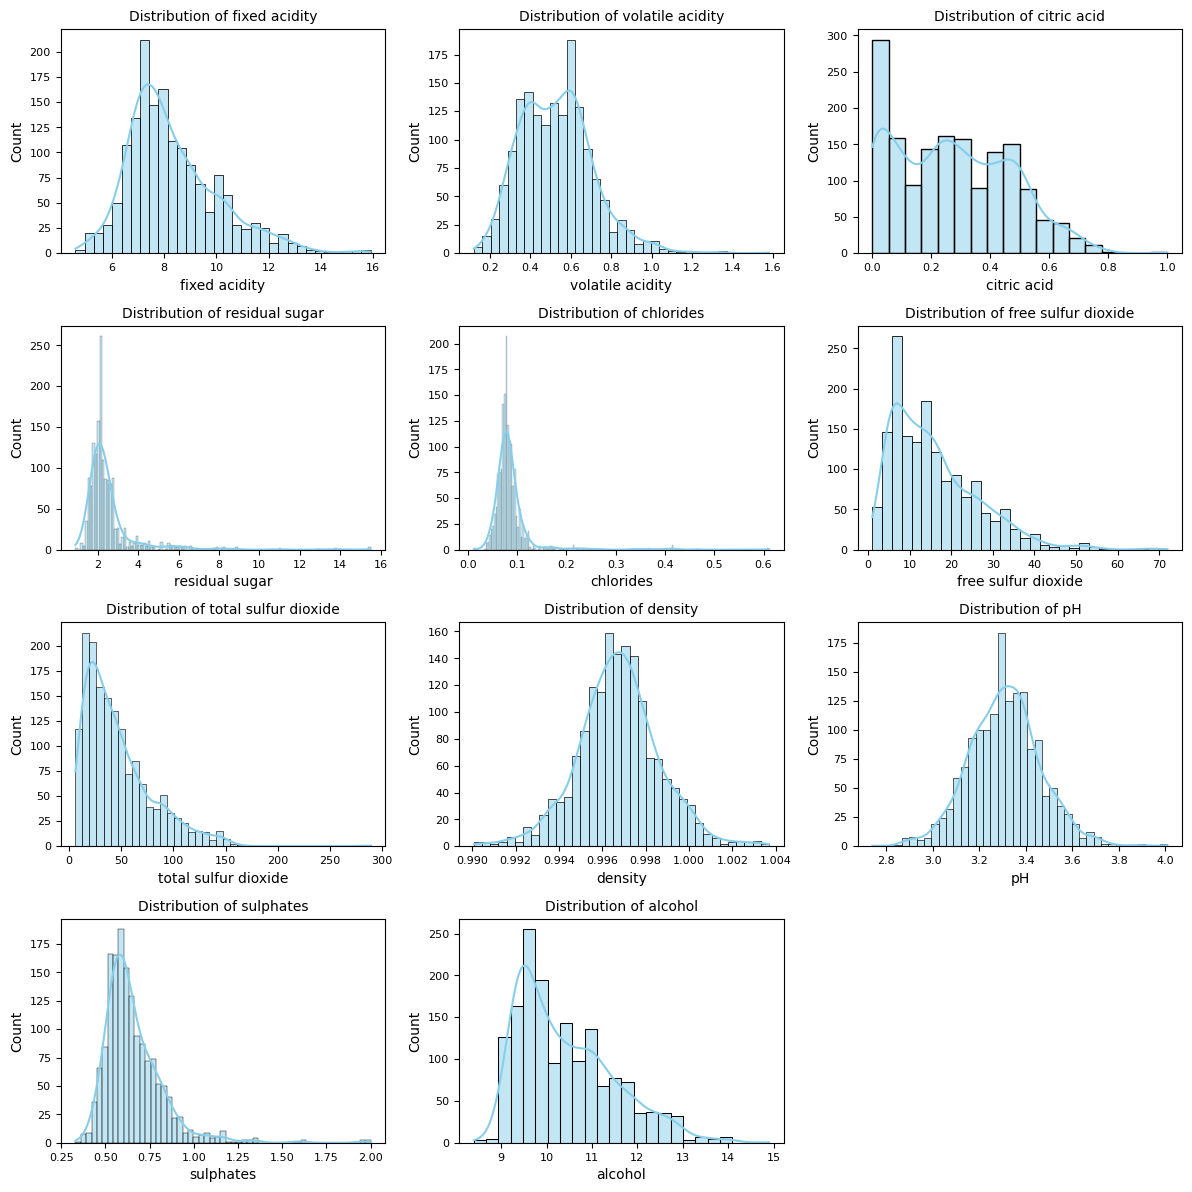

In [7]:
# df.hist(bins=15, figsize=(15, 10))
# plt.tight_layout()
# plt.show()

numeric_cols = df.columns[:-1]  # exclude 'quality'
n_cols = 3
n_rows = math.ceil(len(numeric_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=10)
    axes[i].tick_params(labelsize=8)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=1)
plt.show()

### 2.Correlation heatmap

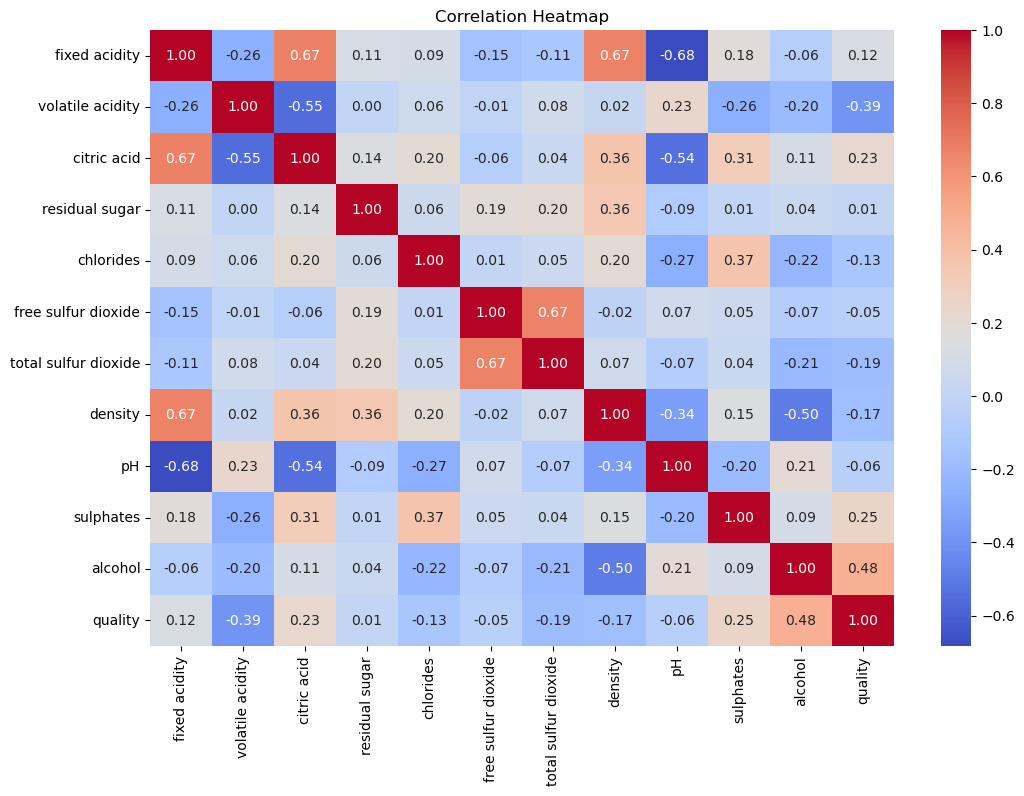

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



### 3.Countplot

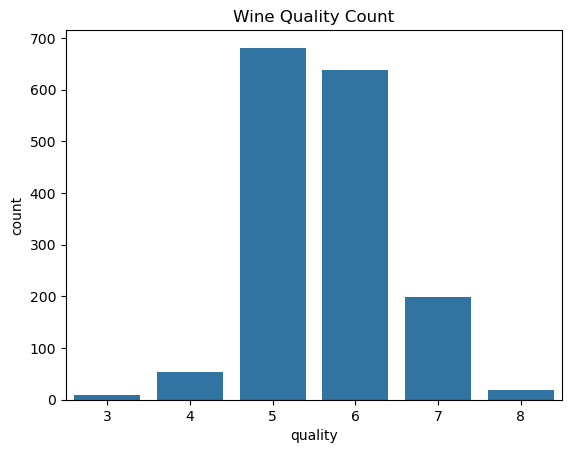

In [9]:
sns.countplot(x="quality", data=df)
plt.title("Wine Quality Count")
plt.show()

### 4.Boxplots

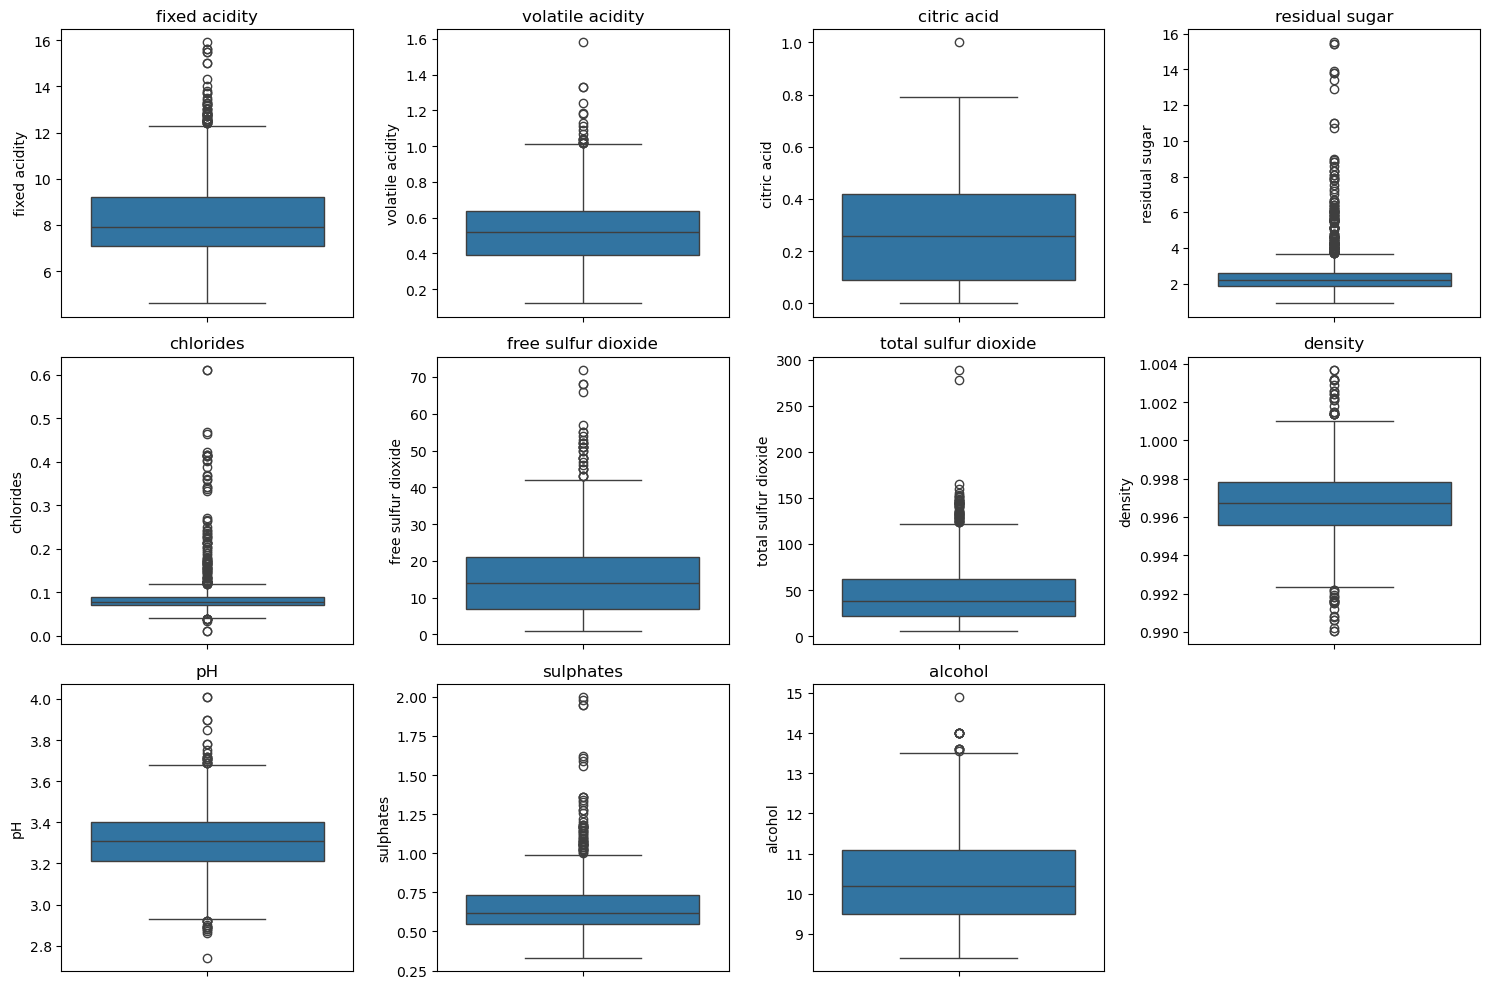

In [10]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns[:-1], 1):  # exclude 'quality'
    plt.subplot(3, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


The boxplots indicate the presence of outliers in several features, including residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, sulphates, and alcohol. These are shown as individual points beyond the whiskers. While outliers are not uncommon in real-world datasets, they can influence certain machine learning models .particularly support vector machines, which are sensitive to margin distortions. Therefore, appropriate handling methods such as robust scaling or outlier filtering may be considered depending on the model's performance.

### 5.Scatterplots for selected feature vs quality

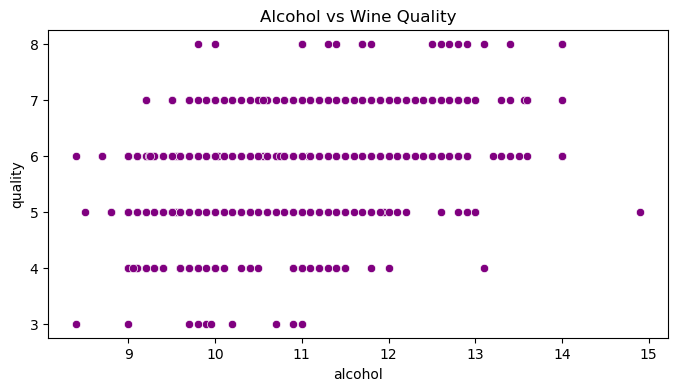

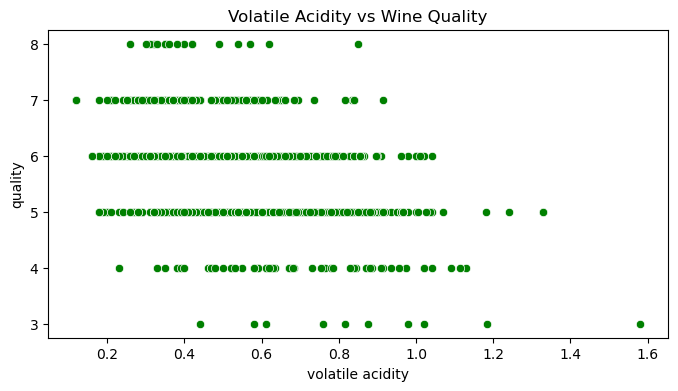

In [11]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='alcohol', y='quality', data=df, color='purple')
plt.title('Alcohol vs Wine Quality')
plt.show()

plt.figure(figsize=(8, 4))
sns.scatterplot(x='volatile acidity', y='quality', data=df, color='green')
plt.title('Volatile Acidity vs Wine Quality')
plt.show()

### Handle Duplicates

In [215]:

print("\nNumber of duplicates:", df.duplicated().sum())


Number of duplicates: 240


In [216]:
if df.duplicated().sum() > 0:
    print("\nDuplicate rows (before removal):")
    print(df[df.duplicated(keep=False)].sort_values(by=list(df.columns)))
    df = df.drop_duplicates()
    print(f"\nRemoved {df.duplicated().sum()} duplicates. New shape:", df.shape)


Duplicate rows (before removal):
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
142             5.2             0.340         0.00             1.8      0.050   
144             5.2             0.340         0.00             1.8      0.050   
131             5.6             0.500         0.09             2.3      0.049   
132             5.6             0.500         0.09             2.3      0.049   
1488            5.6             0.540         0.04             1.7      0.049   
...             ...               ...          ...             ...        ...   
391            13.7             0.415         0.68             2.9      0.085   
243            15.0             0.210         0.44             2.2      0.075   
244            15.0             0.210         0.44             2.2      0.075   
554            15.5             0.645         0.49             4.2      0.095   
555            15.5             0.645         0.49             4.2      0.0

In [217]:
print("\nNumber of duplicates:", df.duplicated().sum())


Number of duplicates: 0


### Handle Target Variable

create a binary classification version(good/bad wine)
we'll consider wines with quality >= 7 as good and others as bad

In [218]:
df['quality_binary'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

# df['quality_category'] = pd.cut(df['quality'], bins=[0, 4, 6, 10], 
#                                 labels=['low', 'medium', 'high'])
# for multi class categorization- must encode the lables with lable encoder

### Separate features and target

train test split

In [219]:
X = df.drop(['quality', 'quality_binary'], axis=1)
y = df['quality_binary']
print("Columns after drop:", X.columns)

Columns after drop: Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


Feature Scaling (Standardization)

split the data before scaling (train_test_split → StandardScaler), which prevents data leakage.

In [220]:
# Split first(not scaled yet)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### outlier handling(using training data only to calculate bounds)

In [221]:
def handle_outliers(df_train, df_test=None):
    numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns
    for feature in numerical_features:
        Q1 = df_train[feature].quantile(0.25)
        Q3 = df_train[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Apply to train
        df_train[feature] = np.clip(df_train[feature], lower_bound, upper_bound)
        
        # Apply same bounds to test if provided
        if df_test is not None:
            df_test[feature] = np.clip(df_test[feature], lower_bound, upper_bound)
    
    return df_train, df_test

X_train, X_test = handle_outliers(X_train, X_test)

### scale

In [222]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Scale original training data
X_test_scaled = scaler.transform(X_test) 

### checking the class is imbalanced or not

In [223]:
print("\nClass Distribution for Binary Classification:")
print(df['quality_binary'].value_counts())


Class Distribution for Binary Classification:
quality_binary
0    1175
1     184
Name: count, dtype: int64


seems as there's significant imbalance, might want to  address it

SMOTE (Synthetic Minority Oversampling Technique) is a method to fix class imbalance in your dataset by generating synthetic samples of the minority class

In [224]:
# Apply SMOTE only to training data
from imblearn.over_sampling import SMOTE


smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

### verification before model training

In [225]:
print("Test data mean (should be small):", np.mean(X_test_scaled, axis=0).round(2))
# Example expected output: [-0.01, 0.03, -0.02, ...]

print("\n=== VARIABLE TRACKING ===")
print("1. Original Shapes:")
print(f"X_train: {X_train.shape} (DataFrame)", 
      f"X_test: {X_test.shape} (DataFrame)")

print("\n2. After SMOTE:")
print(f"X_train_res: {X_train_res.shape} (DataFrame - balanced)",
      f"y_train_res: {len(y_train_res)} (balanced labels)")

print("\n3. After Scaling:")
print(f"X_train_scaled: {X_train_scaled.shape} (numpy array)",
      f"X_test_scaled: {X_test_scaled.shape} (numpy array)")

print("\n4. Final Checks:")
print("Training data mean:", np.mean(X_train_scaled, axis=0).round(2))
print("Test data mean:", np.mean(X_test_scaled, axis=0).round(2))

Test data mean (should be small): [-0.03  0.03 -0.08 -0.11  0.   -0.12 -0.16 -0.06  0.03  0.05  0.04]

=== VARIABLE TRACKING ===
1. Original Shapes:
X_train: (1087, 11) (DataFrame) X_test: (272, 11) (DataFrame)

2. After SMOTE:
X_train_res: (1880, 11) (DataFrame - balanced) y_train_res: 1880 (balanced labels)

3. After Scaling:
X_train_scaled: (1087, 11) (numpy array) X_test_scaled: (272, 11) (numpy array)

4. Final Checks:
Training data mean: [-0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0.]
Test data mean: [-0.03  0.03 -0.08 -0.11  0.   -0.12 -0.16 -0.06  0.03  0.05  0.04]


### Check Feature Distributions:

This type of plot is used to compare distributions before and after preprocessing.

The blue line shows the original distribution of that feature.

The orange line shows the transformed distribution — likely after applying SMOTE, scaling, or outlier handling.

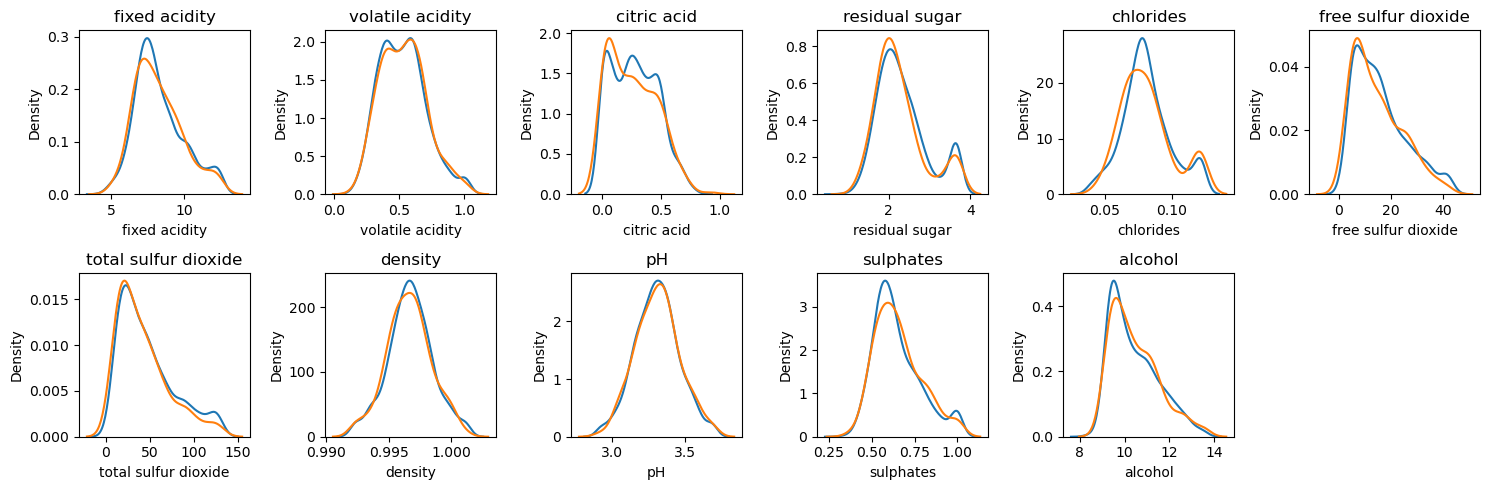

In [226]:
plt.figure(figsize=(15,5))
for i in range(11):
    plt.subplot(2,6,i+1)
    sns.kdeplot(X_train.iloc[:,i], label='Train')
    sns.kdeplot(X_test.iloc[:,i], label='Test')
    plt.title(X_train.columns[i])
plt.tight_layout()
plt.show()

In [227]:
print("\n=== Outlier Verification ===")
print("Train max values:", np.max(X_train_scaled, axis=0).round(2))  # Should be ≤3
print("Test max values:", np.max(X_test_scaled, axis=0).round(2))   # Similar to train

print("\n=== Scaling Verification ===")
print("Train mean (≈0):", np.mean(X_train_scaled, axis=0).round(2))
print("Test mean (small):", np.mean(X_test_scaled, axis=0).round(2))  # Should be near 0


=== Outlier Verification ===
Train max values: [2.43 2.75 2.66 2.16 2.22 2.6  2.53 2.49 2.51 2.55 2.87]
Test max values: [2.43 2.75 3.36 2.16 2.22 2.6  2.53 2.49 2.51 2.55 2.87]

=== Scaling Verification ===
Train mean (≈0): [-0. -0.  0. -0. -0. -0. -0. -0. -0. -0. -0.]
Test mean (small): [-0.03  0.03 -0.08 -0.11  0.   -0.12 -0.16 -0.06  0.03  0.05  0.04]


### initialize SVM with optimized parameters

In [238]:
# model = SVC(kernel='rbf', random_state=42)
# final_model = SVC(
#     kernel='rbf',     
#     C=10,            
#     gamma='scale',      
#     class_weight='balanced',  
#     random_state=42
# )
final_model = SVC(
    kernel='rbf',          
    C=10,              
    gamma='scale',       
    class_weight={0:1, 1:3},  
    probability=True,    
    random_state=42
)


### train the model

In [239]:
# model.fit(X_train_res, y_train_res)  # X_train_res = SMOTE output
final_model.fit(X_train_res, y_train_res)

SVC(C=10, class_weight={0: 1, 1: 3}, probability=True, random_state=42)

In [246]:
# Get probability estimates (for threshold adjustment)
calibrated_svm = CalibratedClassifierCV(final_model, cv=5)
calibrated_svm.fit(X_train_res, y_train_res)
y_probs = calibrated_svm.predict_proba(X_test_scaled)[:, 1]  # P(class=1)

#  Find optimal threshold (balances precision/recall)
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)
optimal_threshold = thresholds[np.argmax(f1_scores)]

#  Make final predictions
y_probs = calibrated_svm.predict_proba(X_test_scaled)[:, 1]
y_pred = (y_probs >= optimal_threshold).astype(int)

Classification Report (includes precision, recall, F1-score)

In [247]:
# print("\n=== OPTIMIZED MODEL PERFORMANCE ===")
# print(f"Optimal Threshold: {optimal_threshold:.3f}")
# print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
# print("\nConfusion Matrix:")
# print(confusion_matrix(y_test, y_pred))
# print("\nDetailed Classification Report:")
# print(classification_report(y_test, y_pred))
print("=== Core Metrics ===")
print(f"Threshold: {optimal_threshold:.3f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Class 1 Recall: {recall_score(y_test, y_pred, pos_label=1):.4f}")
print(f"Class 1 Precision: {precision_score(y_test, y_pred, pos_label=1):.4f}")

# 3. Confusion Matrix (enhanced view)
print("\n=== Confusion Matrix ===")
print(pd.crosstab(y_test, y_pred, 
                 rownames=['Actual'], 
                 colnames=['Predicted'],
                 margins=True))

# 4. Classification Report
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred, digits=4))

=== Core Metrics ===
Threshold: 0.575
Accuracy: 0.9007
Class 1 Recall: 0.5135
Class 1 Precision: 0.6786

=== Confusion Matrix ===
Predicted    0   1  All
Actual                 
0          226   9  235
1           18  19   37
All        244  28  272

=== Classification Report ===
              precision    recall  f1-score   support

           0     0.9262    0.9617    0.9436       235
           1     0.6786    0.5135    0.5846        37

    accuracy                         0.9007       272
   macro avg     0.8024    0.7376    0.7641       272
weighted avg     0.8925    0.9007    0.8948       272



### cross- validation

In [ ]:
cv_f1 = cross_val_score(
    final_model,
    X_train_res,
    y_train_res,
    cv=5,
    scoring='f1_weighted'
)
print(f"\nCV F1-score: {cv_f1.mean():.4f} (±{cv_f1.std():.4f})")




CV F1-score: 0.9289 (±0.0114)
